# Exercise 18

## Analyze class homeworks


In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/E18.xlsx')
data.head()

,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


# Exercise 18.1

Analyze the writing patterns of each student

In [2]:
data.shape

(42, 7)

In [3]:
data['Sexo'].value_counts()

H    34
M     8
Name: Sexo, dtype: int64

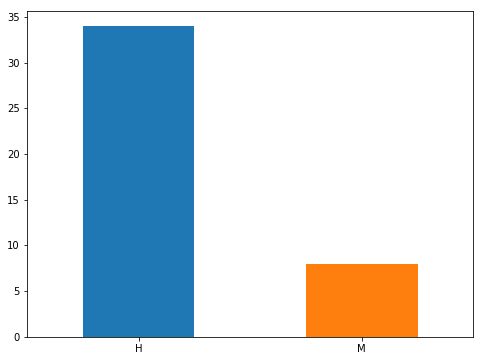

In [4]:
pd.Series(data["Sexo"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

In [5]:
data.isnull().sum()

Sexo     0
T1       1
T2      12
T3      12
T4       6
T5       7
T6      13
dtype: int64

In [6]:
data['Sex_Hombre'] = data.Sexo.map({'M':0, 'H':1})

In [7]:
data.head(1)

,Sexo,T1,T2,T3,T4,T5,T6,Sex_Hombre
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...,1


In [8]:
def concat(*args): 
    strs = [str(arg) for arg in args if not pd.isnull(arg)] 
    return ','.join(strs) if strs else np.nan 
np_concat = np.vectorize(concat) 

In [9]:
data['Total'] = np_concat(data['T1'], data['T2'],data['T3'],data['T4'],data['T5'],data['T6']) 

In [10]:
data.head(1)

,Sexo,T1,T2,T3,T4,T5,T6,Sex_Hombre,Total
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...,1,Un científico de datos y un ingeniero de datos...


In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [12]:
#compara con ngramas, secuencias palabras, secuencias ngramas

X = data['Total']

In [13]:
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)

In [14]:
temp=X_dtm.todense()

In [15]:
vect.vocabulary_

{'un': 5608,
 'científico': 912,
 'de': 1527,
 'datos': 1524,
 'ingeniero': 3084,
 'tienen': 5485,
 'ciertas': 916,
 'habilidades': 2807,
 'en': 2068,
 'común': 1145,
 'por': 4229,
 'ejemplo': 2004,
 'poseen': 4240,
 'programación': 4457,
 'sin': 5147,
 'embargo': 2038,
 'las': 3286,
 'están': 2370,
 'mucho': 3676,
 'más': 3711,
 'allá': 306,
 'hacer': 2825,
 'que': 4572,
 'cree': 1427,
 'flujo': 2608,
 'está': 2369,
 'el': 2010,
 'extremo': 2534,
 'alejado': 280,
 'sus': 5349,
 'pero': 4128,
 'es': 2226,
 'pan': 3992,
 'cada': 765,
 'día': 1956,
 'general': 2719,
 'existen': 2449,
 'varias': 5723,
 'diferencias': 1805,
 'entre': 2179,
 'puede': 4544,
 'organizar': 3946,
 'almacenar': 310,
 'gran': 2775,
 'cantidad': 807,
 'además': 175,
 'realizar': 4666,
 'análisis': 390,
 'descriptivos': 1693,
 'predictivos': 4310,
 'prescriptivos': 4345,
 'con': 1147,
 'fin': 2586,
 'resolver': 4866,
 'una': 5609,
 'necesidad': 3748,
 'negocio': 3760,
 'generar': 2732,
 'valor': 5700,
 'la': 3274,


In [16]:
X_dtm.todense()[0].argmax()

1527

In [17]:
vect.get_feature_names()[1527]

'de'

In [18]:
!pip install yellowbrick
from yellowbrick.text.freqdist import FreqDistVisualizer

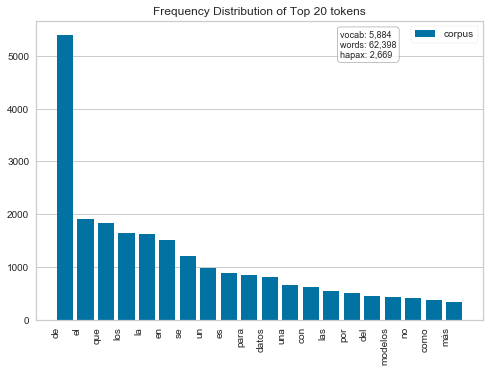

In [19]:
features = vect.get_feature_names() 
visualizer = FreqDistVisualizer(features = features,n=20, orient='v')
visualizer.fit(X_dtm)
visualizer.poof()

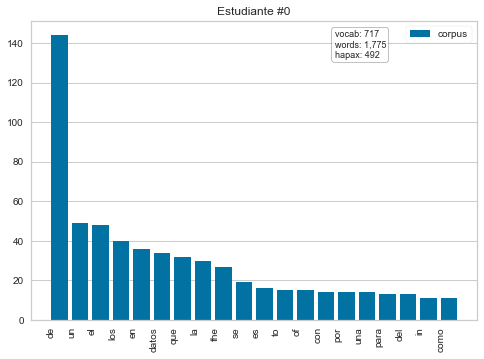

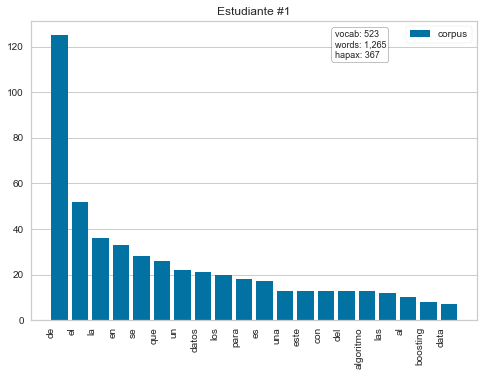

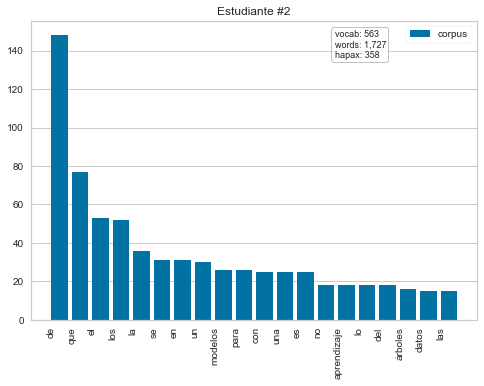

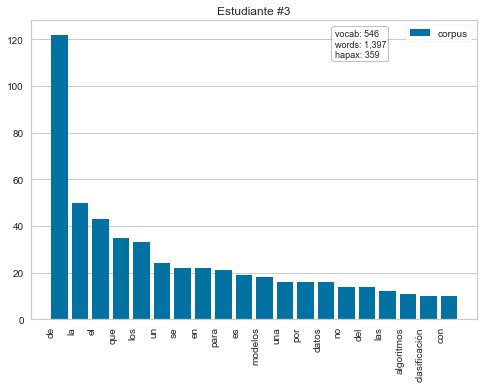

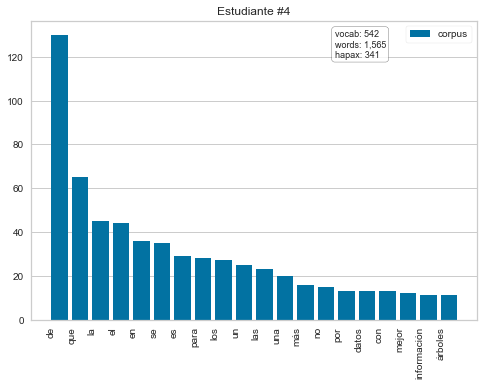

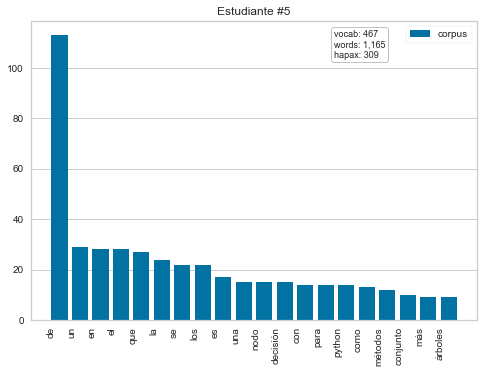

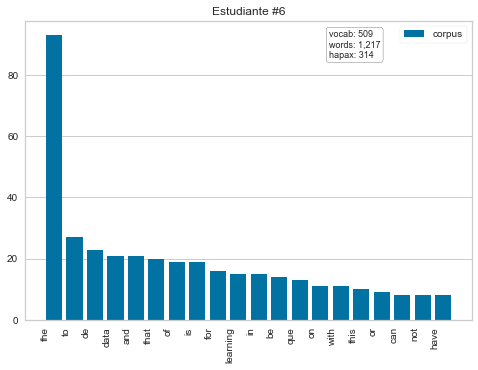

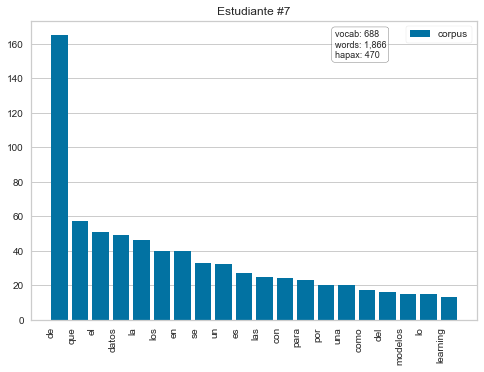

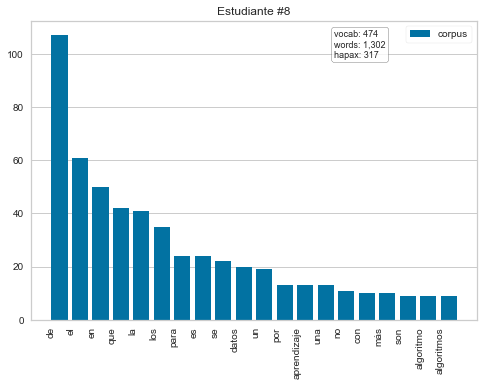

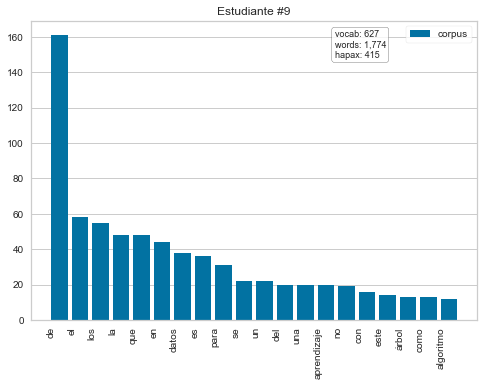

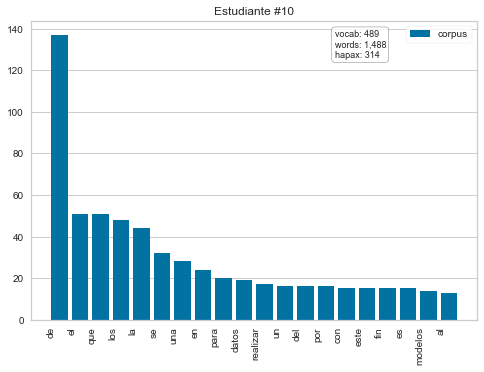

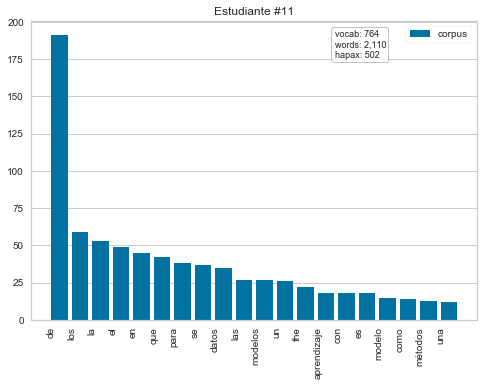

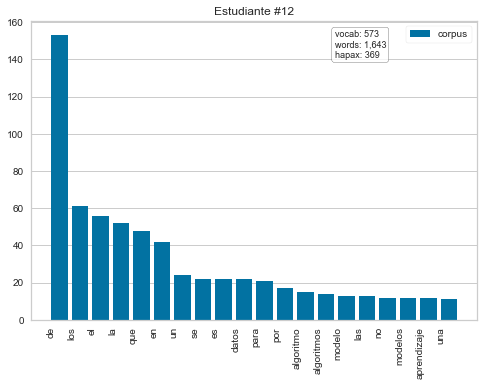

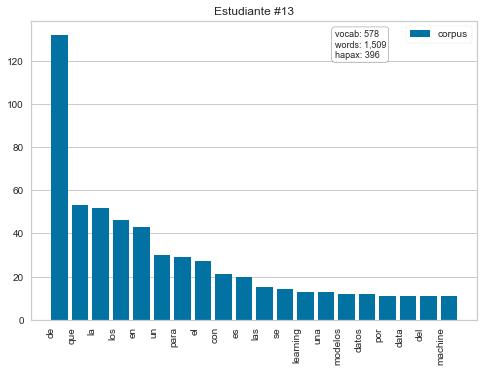

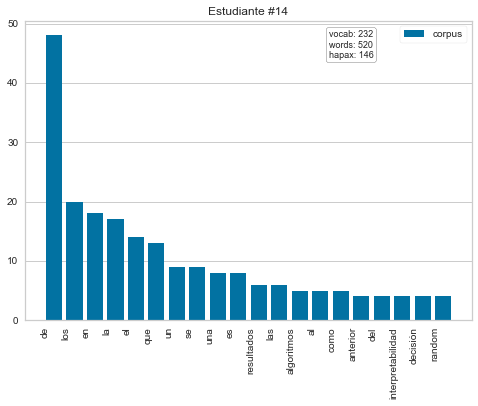

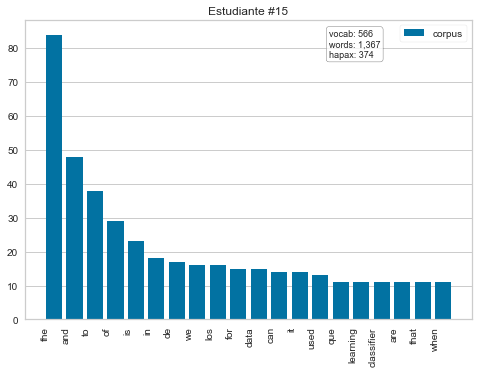

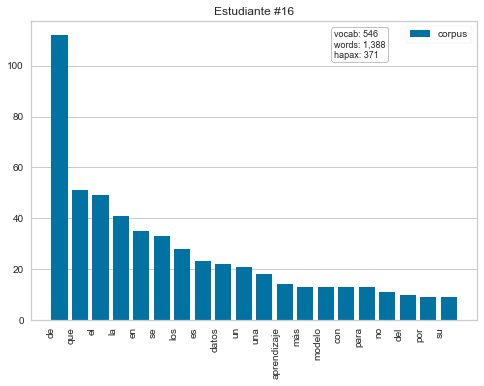

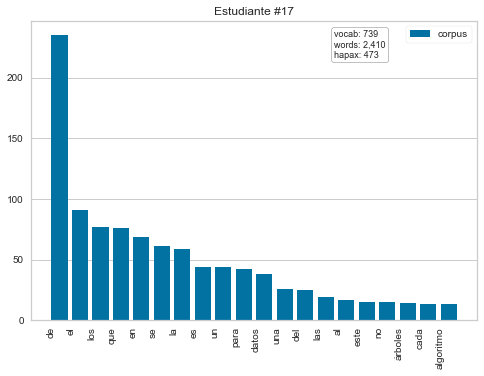

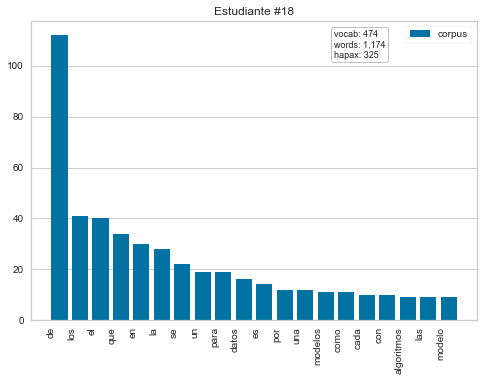

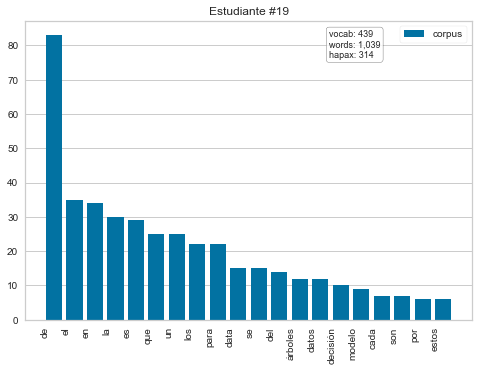

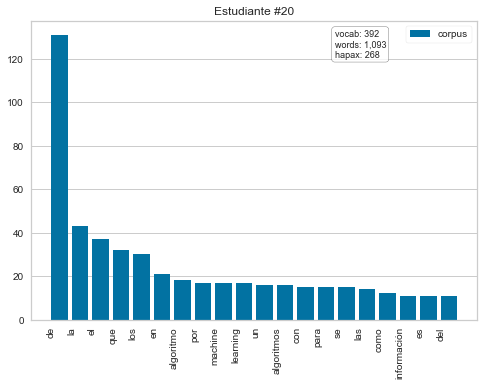

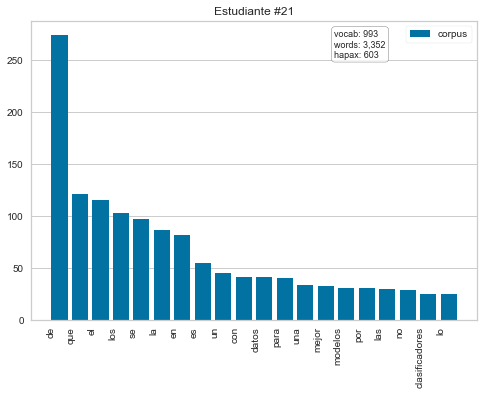

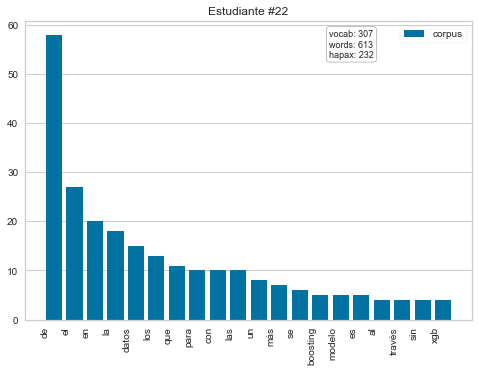

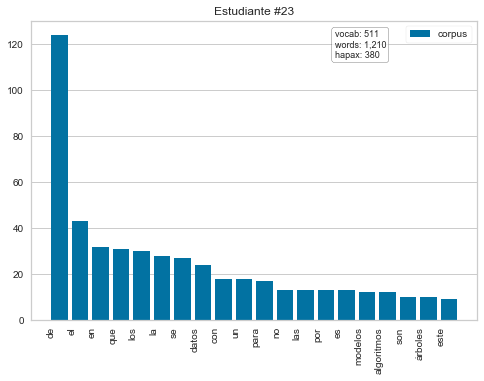

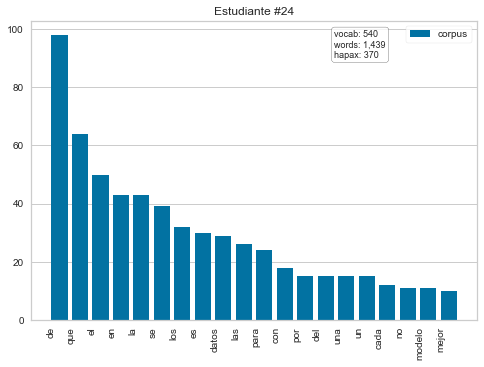

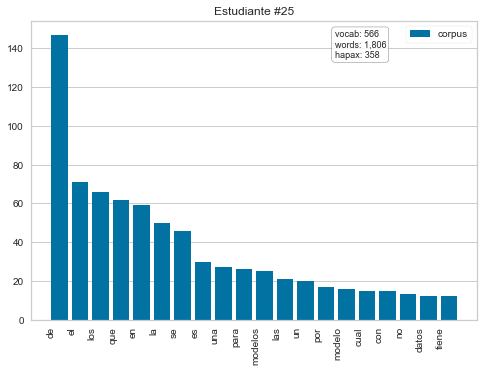

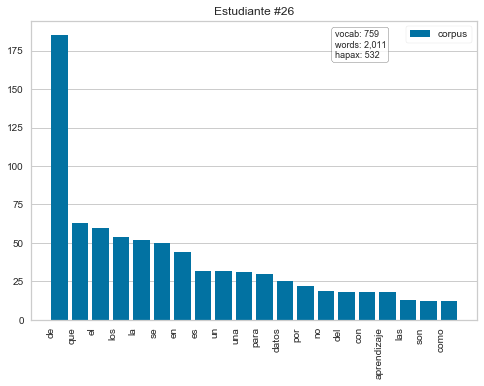

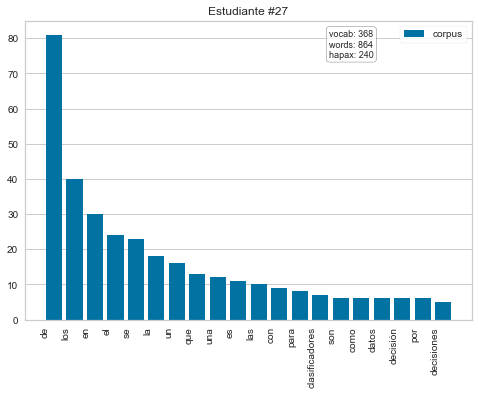

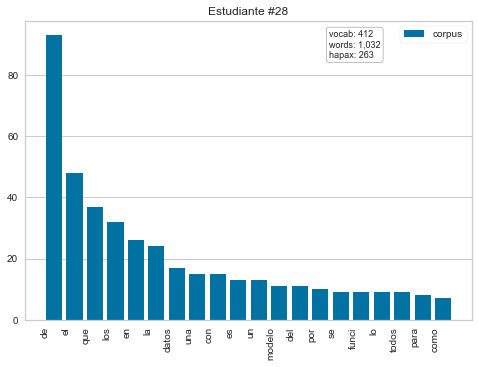

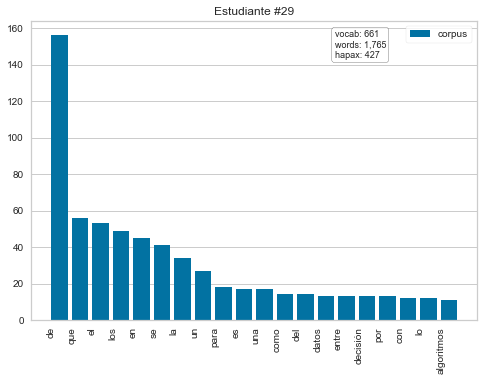

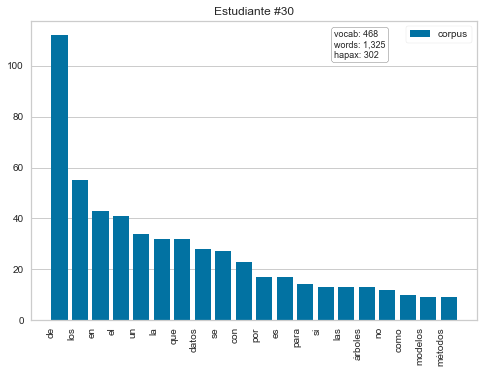

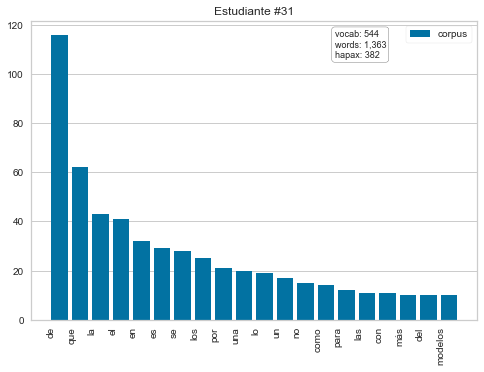

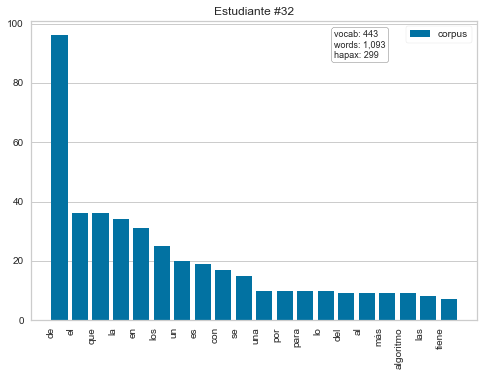

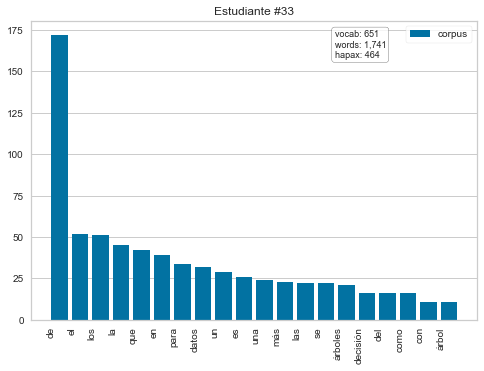

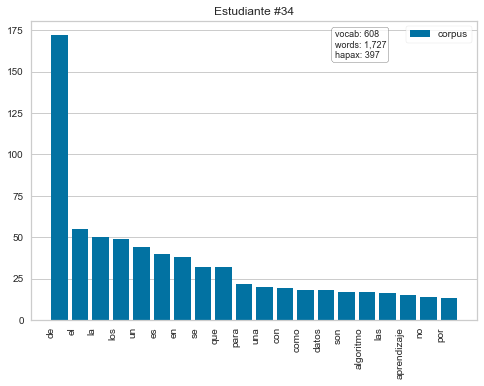

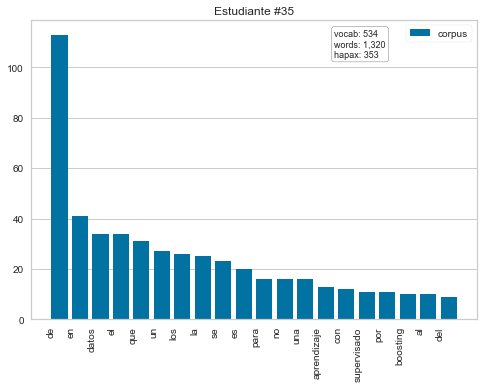

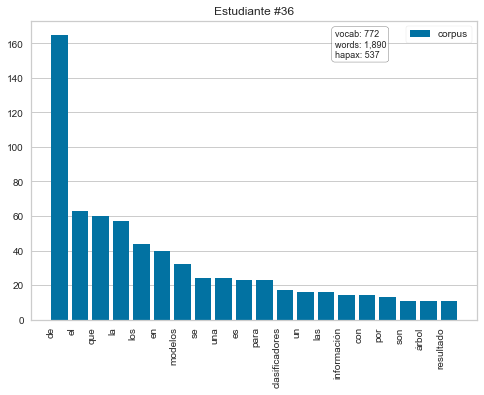

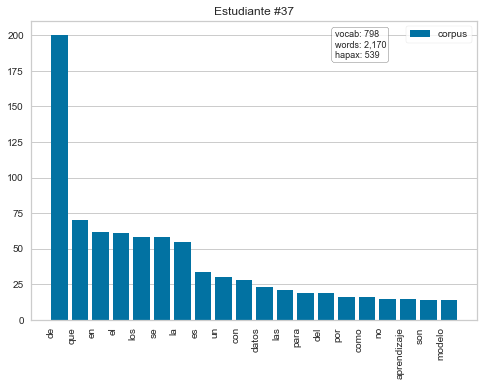

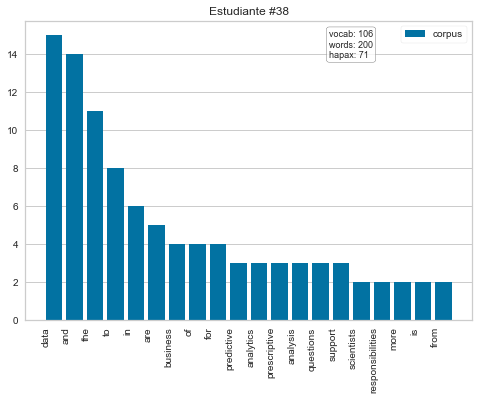

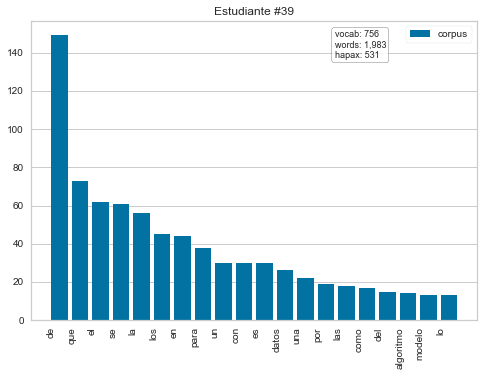

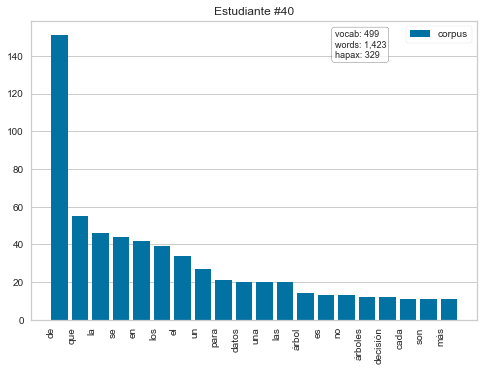

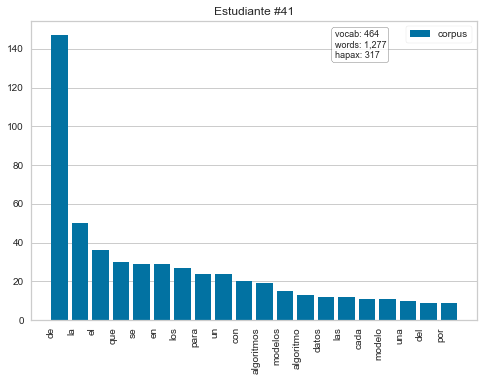

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
salida = pd.DataFrame()
vectr=[]
doct=[]
feat=[]

for indice_fila, fila in data.iterrows():
    X_a = [fila['Total']]
    vectr.append(CountVectorizer(encoding='string'))
    doct.append(vectr[indice_fila].fit_transform(X_a))
    feat.append(vectr[indice_fila].get_feature_names())
    visualizer = FreqDistVisualizer(features = feat[indice_fila],n=20,title='Estudiante #'+str(indice_fila), orient='v')
    visualizer.fit(doct[indice_fila])
    visualizer.poof()


In [21]:
data['vect']=vectr
data['docs']=doct
data['feat']=feat

In [22]:
data.head()

,Sexo,T1,T2,T3,T4,T5,T6,Sex_Hombre,Total,vect,docs,feat
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...,1,Un científico de datos y un ingeniero de datos...,"CountVectorizer(analyzer='word', binary=False,...","(0, 346)\t1\n (0, 582)\t1\n (0, 194)\t1\n ...","[101, 121, 123, 140, 151, 17, 170, 179, 183, 2..."
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...,1,Aunque los dos perfiles cuentan con habilidade...,"CountVectorizer(analyzer='word', binary=False,...","(0, 63)\t1\n (0, 106)\t1\n (0, 95)\t1\n (...","[121, 17, 179, 20, 2014, 92, 93, 94, abordar, ..."
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...,1,Python vs Stata. Analizar información es un pr...,"CountVectorizer(analyzer='word', binary=False,...","(0, 121)\t1\n (0, 174)\t1\n (0, 224)\t1\n ...","[121, 17, 179, abierto, accuracy, acertado, ac..."
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN,0,Los algoritmos de machine learning buscan pred...,"CountVectorizer(analyzer='word', binary=False,...","(0, 0)\t1\n (0, 499)\t1\n (0, 229)\t1\n (...","[94, academias, accuracy, aceptar, acuerdo, ad..."
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...,1,Python vs R para análisis de datos. A pesar de...,"CountVectorizer(analyzer='word', binary=False,...","(0, 501)\t1\n (0, 530)\t1\n (0, 359)\t1\n ...","[180, acciones, accuracy, acertada, actualment..."


# Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

calcular distancias, cada punto represente conjunto de tareas por usuario, calcular ladistancia entre alumnos, pito a cada usuario por separado y calculo la distancia, con ngramas sin ngramas con stopwords sin stopwords, revisar con que se comprende el texto

In [24]:
!pip install textdistance

In [97]:
import textdistance

str1='uno de'
str2='uno'
hamming = textdistance.hamming(str1,str2)
hamming_nor=textdistance.hamming.normalized_similarity(str1,str2)

print("hamming", str(hamming))
print("hamming_normal", str(hamming_nor))

hamming 3
hamming_normal 0.5


In [28]:
import textdistance

fil=[]
sim_f =[]
for indice_fila_1, fila_1 in data.iterrows():
    col=[]
    sim_c=[]
    for indice_fila_2, fila_2 in data.iterrows():
        col.append(textdistance.hamming(fila_1['feat'],fila_2['feat']))
        sim_c.append(textdistance.hamming.normalized_similarity(fila_1['feat'],fila_2['feat']))
    fil.append(col)
    sim_f.append(sim_c)
data['hamm']=fil
data['hamm_sim']=sim_f

In [29]:
data.head()

,Sexo,T1,T2,T3,T4,T5,T6,Sex_Hombre,Total,vect,docs,feat,hamm,hamm_sim
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...,1,Un científico de datos y un ingeniero de datos...,"CountVectorizer(analyzer='word', binary=False,...","(0, 346)\t1\n (0, 582)\t1\n (0, 194)\t1\n ...","[101, 121, 123, 140, 151, 17, 170, 179, 183, 2...","[0, 717, 717, 717, 717, 717, 717, 716, 717, 71...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00139470..."
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...,1,Aunque los dos perfiles cuentan con habilidade...,"CountVectorizer(analyzer='word', binary=False,...","(0, 63)\t1\n (0, 106)\t1\n (0, 95)\t1\n (...","[121, 17, 179, 20, 2014, 92, 93, 94, abordar, ...","[717, 0, 559, 545, 531, 523, 520, 685, 523, 62...","[0.0, 1.0, 0.007104795737122527, 0.00183150183..."
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...,1,Python vs Stata. Analizar información es un pr...,"CountVectorizer(analyzer='word', binary=False,...","(0, 121)\t1\n (0, 174)\t1\n (0, 224)\t1\n ...","[121, 17, 179, abierto, accuracy, acertado, ac...","[717, 559, 0, 563, 563, 563, 560, 685, 563, 62...","[0.0, 0.007104795737122527, 1.0, 0.0, 0.0, 0.0..."
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN,0,Los algoritmos de machine learning buscan pred...,"CountVectorizer(analyzer='word', binary=False,...","(0, 0)\t1\n (0, 499)\t1\n (0, 229)\t1\n (...","[94, academias, accuracy, aceptar, acuerdo, ad...","[717, 545, 563, 0, 537, 546, 545, 688, 546, 62...","[0.0, 0.001831501831501825, 0.0, 1.0, 0.016483..."
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...,1,Python vs R para análisis de datos. A pesar de...,"CountVectorizer(analyzer='word', binary=False,...","(0, 501)\t1\n (0, 530)\t1\n (0, 359)\t1\n ...","[180, acciones, accuracy, acertada, actualment...","[717, 531, 563, 537, 0, 541, 542, 688, 541, 62...","[0.0, 0.020295202952029467, 0.0, 0.01648351648..."


# Exercise 18.3

Create a classifier to predict the sex of each student



In [30]:
data['Sex_Hombre'] = data.Sexo.map({'H':1, 'M':0})

In [ ]:
#signos puntuación, adjetivos
#paralelizar 

Parallel(n_jobs=1)(delayed(sqrt)(i**2) for i in range(10))

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    